# Project: The Global View of World Economies and Societies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I gathered data from GapMinder, which aggregates data from credible sources.  I elected to look at six metrics.

1.  HDI (Human Development Index - an aggregate score from 0 to 1 of education, health care, and economy)
2.  Life Expectancy
3.  Children per mother
4.  Democracy
5.  CO2 emissions per person
6.  Income per person with cost of living adjusted

### Purpose


Overall, the purpose of this was encompassed in two major analyses.  First, HDI and CO2 are examined with reference to the other metrics.  Secondly, changes from 1990 to 2011 are looked at with an emphasis on CO2. 

Specifically, I looked at 10 questions:

>Q1a: How is income distributed throughout the world?

>Q1b: How are CO2 emissions distributed throughout the world?

>Q1c: How is HDI distributed throughout the world?

>Q2: How does HDI relate to the other measures?

>Q3: How does income relate to CO2 emissions per person?

>Q4: Are CO2 emissions per person generally increasing or decreasing from 1990 to 2011?

>Q5: Which country decreased their CO2 emissions per person the most from 1990 to 2011?

>Q6: Which country increased their CO2 emissions per person the most from 1990 to 2011?

>Q7: Which country decreased their income per person the most from 1990 to 2011?

>Q8: Which country increased their income per person the most from 1990 to 2011?

>Q9: Which country decreased their HDI the most from 1990 to 2011?

>Q10: Which country increased their HDI the most from 1990 to 2011?

<a id='wrangling'></a>
## Data Wrangling


### First, I input my import statements and pulled in all my data I downloaded as .csv from Gapminder

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df_life = pd.read_csv('life_expectancy_years.csv')
df_children = pd.read_csv('children_per_woman_total_fertility.csv')
df_hdi = pd.read_csv('hdi_human_development_index.csv')
df_democracy = pd.read_csv('democracy_score_use_as_color.csv')
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [110]:
df_income.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,5910,5900,5910,6000,6190,6260,6230,6030,5940,5850


In [112]:
df_hdi.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


### Data Cleaning

I realize at this point that my datasets have varying numbers of years within them, so I choose to only include the years 1990 to 2011.  These are the only dates that overlap between the six datasets I got from GapMinder.

Additionally, I need to retain "geo" as a column header for later merges.

In [113]:
# only choose 1990 to 2011 in all datasets
#df_income[['geo','1991','1992']]
df_life = df_life[['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
                  '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]
df_children = df_children[['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
                  '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]
df_hdi = df_hdi[['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
                  '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]
df_democracy = df_democracy[['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
                  '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]
df_co2 = df_co2[['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
                  '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]
df_income = df_income[['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
                  '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011']]

#df_children = df_children.groupby('geo')['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
#                       '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'].mean()
#df_hdi = df_hdi.groupby('geo')['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
#                       '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'].mean()
#df_democracy = df_democracy.groupby('geo')['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
#                       '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'].mean()
#df_co2 = df_co2.groupby('geo')['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
#                       '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'].mean()
#df_income = df_income.groupby('geo')['geo','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
#                       '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'].mean();

In [116]:
df_income.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,1040,1030,950,818,732,881,904,930,956,...,1060,1100,1060,1140,1160,1290,1300,1530,1610,1660
1,Albania,4560,3230,3010,3320,3620,4130,4530,4070,4460,...,6230,6620,7020,7460,7920,8450,9150,9530,9930,10200
2,Algeria,10200,9870,9820,9400,9130,9300,9510,9460,9800,...,10800,11500,11800,12300,12300,12600,12700,12600,12900,13000
3,Andorra,28400,28000,27200,26000,25900,26100,27200,29700,30800,...,31900,34500,36300,39800,42700,43400,41400,41700,39000,42000
4,Angola,4390,4210,3790,2760,2770,2970,3210,3370,3500,...,3180,3240,3460,3950,4600,5440,5980,5910,5900,5910


I note that although I only have overlapping years in these datasets now, I still have some null values I will have to deal with later.

Now, I prepare to merge the datasets by renaming the column headers

### Merge Data - Rename Headers

In [117]:
# rename life columns
df_life = df_life.rename(columns=lambda x: x[:10] + "_life")

# rename children columns
df_children = df_children.rename(columns=lambda x: x[:10] + "_children")

# rename hdi columns
df_hdi = df_hdi.rename(columns=lambda x: x[:10] + "_hdi")

# rename democracy columns
df_democracy = df_democracy.rename(columns=lambda x: x[:10] + "_democracy")

# rename co2 columns
df_co2 = df_co2.rename(columns=lambda x: x[:10] + "_co2")

# rename income columns
df_income = df_income.rename(columns=lambda x: x[:10] + "_income")

In [118]:
df_life.head()

,geo_life,1990_life,1991_life,1992_life,1993_life,1994_life,1995_life,1996_life,1997_life,1998_life,...,2002_life,2003_life,2004_life,2005_life,2006_life,2007_life,2008_life,2009_life,2010_life,2011_life
0,Afghanistan,51.6,51.3,51.4,51.4,50.7,51.1,51.4,51.1,50.1,...,52.4,53.0,53.5,53.9,54.1,54.6,55.2,55.7,56.2,56.7
1,Albania,73.9,73.9,73.9,73.9,74.0,74.1,74.3,72.5,74.3,...,74.5,74.6,74.7,74.9,75.2,75.4,75.6,75.9,76.3,76.7
2,Algeria,71.0,71.4,71.7,72.0,72.1,72.3,72.8,73.0,73.1,...,74.4,74.5,75.1,75.4,75.6,75.9,76.1,76.3,76.5,76.7
3,Andorra,79.5,79.5,79.6,79.8,80.0,80.3,80.6,81.0,81.3,...,82.3,82.4,82.3,82.5,82.5,82.7,82.7,82.7,82.7,82.6
4,Angola,50.2,50.8,51.0,49.7,51.1,52.0,52.3,52.7,52.8,...,54.5,55.1,55.7,56.5,57.0,57.8,58.6,59.3,60.1,60.9


### Fill N/A values with averages of given country in given metric for years 1990 to 2011

I fix null values in all of these datasets prior to merging so when I fill averages, they are specific to only hdi, only co2, only income, etc.

In [119]:
# fill na for life columns
df_life = df_life.T.fillna(df_life.mean(axis=1)).T

# fill na for children columns
df_children = df_children.T.fillna(df_children.mean(axis=1)).T

# fill na for hdi columns
df_hdi = df_hdi.T.fillna(df_hdi.mean(axis=1)).T

# fill na for democracy columns
df_democracy = df_democracy.T.fillna(df_democracy.mean(axis=1)).T

# fill na for co2 columns
df_co2 = df_co2.T.fillna(df_co2.mean(axis=1)).T

# fill na for income columns
df_income = df_income.T.fillna(df_income.mean(axis=1)).T

Despite filling all null values, a country in co2 and democracy has no values.  So, I'll address that later by dropping out rows with null values once all datasets are merged

### Merge Data Sets

In [120]:
# merge life and children
df_combined = pd.merge(df_life, df_children, left_on='geo_life', right_on='geo_children')

# merge life+children with hdi
df_combined = pd.merge(df_combined, df_hdi, left_on='geo_life', right_on='geo_hdi')

# merge life+children+hdi with democracy
df_combined = pd.merge(df_combined, df_democracy, left_on='geo_life', right_on='geo_democracy')

# merge life+children+hdi+democracy with co2
df_combined = pd.merge(df_combined, df_co2, left_on='geo_life', right_on='geo_co2')

# merge life+children+hdi+democracy with income
df_combined = pd.merge(df_combined, df_income, left_on='geo_life', right_on='geo_income')

In [121]:
df_combined.head()

,geo_life,1990_life,1991_life,1992_life,1993_life,1994_life,1995_life,1996_life,1997_life,1998_life,...,2002_income,2003_income,2004_income,2005_income,2006_income,2007_income,2008_income,2009_income,2010_income,2011_income
0,Afghanistan,51.6,51.3,51.4,51.4,50.7,51.1,51.4,51.1,50.1,...,1060,1100,1060,1140,1160,1290,1300,1530,1610,1660
1,Albania,73.9,73.9,73.9,73.9,74,74.1,74.3,72.5,74.3,...,6230,6620,7020,7460,7920,8450,9150,9530,9930,10200
2,Algeria,71,71.4,71.7,72,72.1,72.3,72.8,73,73.1,...,10800,11500,11800,12300,12300,12600,12700,12600,12900,13000
3,Angola,50.2,50.8,51,49.7,51.1,52,52.3,52.7,52.8,...,3180,3240,3460,3950,4600,5440,5980,5910,5900,5910
4,Argentina,72.1,72.3,72.5,72.7,73,73.1,73.3,73.5,73.7,...,12400,13400,14400,15500,16600,17900,18400,17200,18700,19600


### Remove null values

First, by checking for missing values

In [122]:
sum(df_combined.isnull().sum())

22

Now, I only keep the rows without null values

In [124]:
df_combined = df_combined.dropna()

Now, all values are filled

In [125]:
sum(df_combined.isnull().sum())

0

### Final column additions for change metrics

These columns hold values for the changes per country in each metric from 2011 to 1990

In [126]:
df_combined['life_change'] = df_combined['2011_life'] - df_combined['1990_life']
df_combined['children_change'] = df_combined['2011_children'] - df_combined['1990_children']
df_combined['hdi_change'] = df_combined['2011_hdi'] - df_combined['1990_hdi']
df_combined['democracy_change'] = df_combined['2011_democracy'] - df_combined['1990_democracy']
df_combined['co2_change'] = df_combined['2011_co2'] - df_combined['1990_co2']
df_combined['income_change'] = df_combined['2011_income'] - df_combined['1990_income']

In [127]:
df_combined.head(5)

,geo_life,1990_life,1991_life,1992_life,1993_life,1994_life,1995_life,1996_life,1997_life,1998_life,...,2008_income,2009_income,2010_income,2011_income,life_change,children_change,hdi_change,democracy_change,co2_change,income_change
0,Afghanistan,51.6,51.3,51.4,51.4,50.7,51.1,51.4,51.1,50.1,...,1300,1530,1610,1660,5.1,-1.87,0.168,3.36364,0.199,620
1,Albania,73.9,73.9,73.9,73.9,74,74.1,74.3,72.5,74.3,...,9150,9530,9930,10200,2.8,-1.31,0.117,8,0.11,5640
2,Algeria,71,71.4,71.7,72,72.1,72.3,72.8,73,73.1,...,12700,12600,12900,13000,5.7,-1.8,0.155,4,0.32,2800
3,Angola,50.2,50.8,51,49.7,51.1,52,52.3,52.7,52.8,...,5980,5910,5900,5910,10.7,-1.17,0.0654615,5,0.83,1520
4,Argentina,72.1,72.3,72.5,72.7,73,73.1,73.3,73.5,73.7,...,18400,17200,18700,19600,3.9,-0.63,0.117,1,1.17,8800


<a id='eda'></a>
## Exploratory Data Analysis


### Q1a: How is income distributed throughout the world?

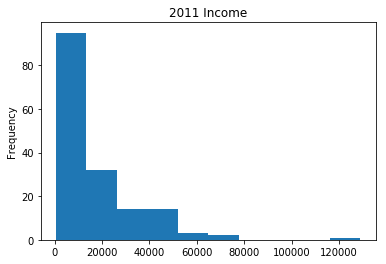

In [128]:
df_combined['2011_income'].plot(kind='hist', title = '2011 Income');

Income around the world is very highly right-skewed with roughly 100 of the 168 countries in our dataset having average incomes (GDP per capita) of around 10,000 dollars.

### Q1b: How are CO2 emissions distributed throughout the world?

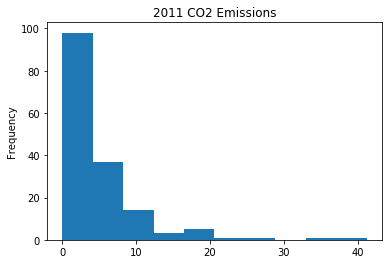

In [129]:
df_combined['2011_co2'].plot(kind='hist', title = '2011 CO2 Emissions');

CO2 emissions per person in metric tons around the world is very highly right-skewed with roughly 100 of the 168 countries in our dataset emitting very little CO2.

### Q1c: How is HDI distributed throughout the world?

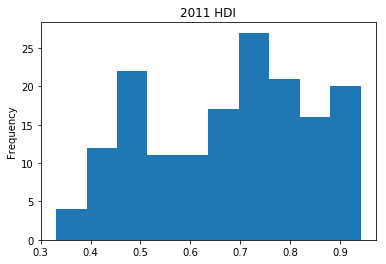

In [130]:
df_combined['2011_hdi'].plot(kind='hist', title = '2011 HDI');

HDI's distribution is slightly left-skewed but much more of a normal curve than both CO2 emissions and income

### Q2: How does HDI relate to the other measures?

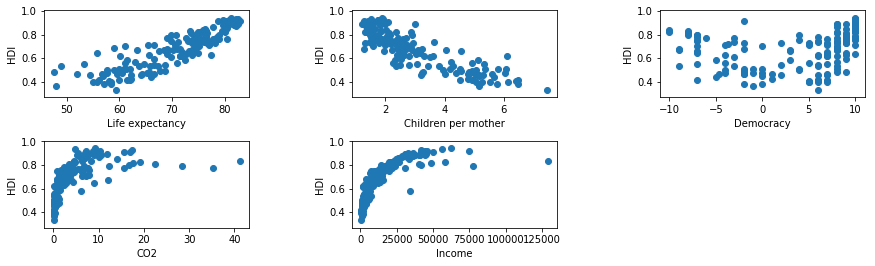

In [131]:
x1 = df_combined['2011_life']
x2 = df_combined['2011_children']
x3 = df_combined['2011_democracy']
x4 = df_combined['2011_co2']
x5 = df_combined['2011_income']

y = df_combined['2011_hdi']

plt.subplot(2,3,1)
plt.scatter(x1,y)
plt.xlabel('Life expectancy')
plt.ylabel('HDI')

plt.subplot(2,3,2)
plt.scatter(x2,y)
plt.xlabel('Children per mother')
plt.ylabel('HDI')

plt.subplot(2,3,3)
plt.scatter(x3,y)
plt.xlabel('Democracy')
plt.ylabel('HDI')

plt.subplot(2,3,4)
plt.scatter(x4,y)
plt.xlabel('CO2')
plt.ylabel('HDI')

plt.subplot(2,3,5)
plt.scatter(x5,y)
plt.ylabel('HDI')
plt.xlabel('Income')

plt.subplots_adjust(left=-1, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

plt.show;

So, with an increase in life expectancy, we can expect a linear increase in HDI.  With an increase in children per mother, we can expect a linear decrease in HDI.  Democracy doesn't seem to be a good predictor of HDI.  With an increase in CO2 emissions, we can expect HDI to increase until metric tons of CO2 per person exceeds 10.  After that point, an increase in CO2 emissions per person no longer increases HDI.  Finally, income per person follows essentially the same curve CO2 emissions did where income seems to increase HDI until income reaches around $40k, at which point additional income doesn't seem to increase HDI.

### Q3: How does income relate to CO2 emissions per person?

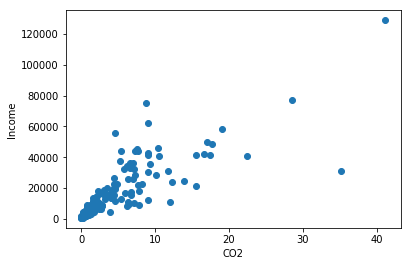

In [132]:
plt.scatter(df_combined['2011_co2'],df_combined['2011_income'])
plt.xlabel('CO2')
plt.ylabel('Income');

Hence, we observe a positive linear relationship between income and CO2.  Income per person and CO2 emissions per person seem to be highly correlated.

### Q4: Are CO2 emissions per person generally increasing or decreasing from 1990 to 2011?

In [133]:
df_combined['co2_change'].mean()

0.27730151335896691

From 1990 to 2011, CO2 emissions have, in general, increased per country by 0.28 metric tonnes per person

### Q5: Which country decreased their CO2 emissions per person the most from 1990 to 2011?

In [134]:
df_combined[['geo_life','co2_change']].loc[df_combined['co2_change'].idxmin()]

geo_life      United Arab Emirates
co2_change                    -8.9
Name: 152, dtype: object

### Q6: Which country increased their CO2 emissions per person the most from 1990 to 2011?

In [135]:
df_combined[['geo_life','co2_change']].loc[df_combined['co2_change'].idxmax()]

geo_life      Trinidad and Tobago
co2_change                   21.3
Name: 146, dtype: object

### Q7: Which country decreased their income per person the most from 1990 to 2011?

In [136]:
df_combined[['geo_life','income_change']].loc[df_combined['income_change'].idxmin()]

geo_life         United Arab Emirates
income_change                  -52600
Name: 152, dtype: object

### Q8: Which country increased their income per person the most from 1990 to 2011?

In [137]:
df_combined[['geo_life','income_change']].loc[df_combined['income_change'].idxmax()]

geo_life         Qatar
income_change    58200
Name: 118, dtype: object

### Q9: Which country decreased their HDI the most from 1990 to 2011?

In [138]:
df_combined[['geo_life','hdi_change']].loc[df_combined['hdi_change'].idxmin()]

geo_life      Zimbabwe
hdi_change      -0.035
Name: 161, dtype: object

### Q10: Which country increased their HDI the most from 1990 to 2011?

In [139]:
df_combined[['geo_life','hdi_change']].loc[df_combined['hdi_change'].idxmax()]

geo_life      Rwanda
hdi_change     0.231
Name: 121, dtype: object

<a id='conclusions'></a>
## Conclusions

In sum, we notice a few major findings:

1.  Income across the world is highly right-skewed.  The vast majority of the world earns very little.
2.  CO2 emissions per person follow the same distribution as income with most countries emitting very little CO2 while a few countries emit a lot.
3.  CO2 emissions appear to linearly correlate with income, and income appears to be the best linear relation to CO2 emissions.
4.  HDI increases initially as income increases, but HDI no longer increases after income increases over $40k or so.  Hence, this seems to show that HDI increases exponentially as people's needs are met, but perhaps not as much as their additional wants are met.
5.  Overall, CO2 emissions per country increased by 0.28 metric tons per person from 1990 to 2011.

In [141]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0